# sklearn v/s sklearnex
## Comparing Stock Scikit-Learn with Intel Extension for Scikit-Learn

In [26]:
#importing the required libraries
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearnex import patch_sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [27]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [28]:
data = pl.read_csv(r"synthetic_data_1m.csv")

In [29]:
data.head()

Age,Sex,BMI,Smoker,HighBP,HighChol,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,Diabetes_binary
i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
52,0,24.353116,0,0,0,1,0,1,0,4,19,12,0
93,1,36.023272,0,0,0,1,0,1,1,5,14,16,0
15,0,15.643872,1,0,1,1,0,1,0,2,13,11,0
72,0,19.848362,1,1,1,1,1,1,1,2,2,15,0
61,0,18.18685,0,0,1,1,1,1,1,2,1,9,1


In [30]:
data.tail()

Age,Sex,BMI,Smoker,HighBP,HighChol,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,Diabetes_binary
i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
85,0,31.635574,1,0,1,0,0,0,0,4,28,10,0
54,1,24.828693,0,1,1,0,1,0,1,1,13,23,0
70,1,38.369285,1,0,1,0,1,0,0,5,27,17,0
38,1,34.813512,1,0,0,0,1,1,1,5,2,8,1
23,1,33.367823,0,0,1,1,0,0,1,2,9,25,0


In [31]:
data.shape

(1000000, 14)

In [32]:
features = data[["Age", "Sex", "BMI", "Smoker", "HighBP", "HighChol", "Stroke", "HeartDiseaseorAttack",
"PhysActivity", "HvyAlcoholConsump", "GenHlth", "MentHlth", "PhysHlth"]]

In [33]:
features.head()

Age,Sex,BMI,Smoker,HighBP,HighChol,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth
i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
52,0,24.353116,0,0,0,1,0,1,0,4,19,12
93,1,36.023272,0,0,0,1,0,1,1,5,14,16
15,0,15.643872,1,0,1,1,0,1,0,2,13,11
72,0,19.848362,1,1,1,1,1,1,1,2,2,15
61,0,18.18685,0,0,1,1,1,1,1,2,1,9


In [34]:
features.tail()

Age,Sex,BMI,Smoker,HighBP,HighChol,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth
i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
85,0,31.635574,1,0,1,0,0,0,0,4,28,10
54,1,24.828693,0,1,1,0,1,0,1,1,13,23
70,1,38.369285,1,0,1,0,1,0,0,5,27,17
38,1,34.813512,1,0,0,0,1,1,1,5,2,8
23,1,33.367823,0,0,1,1,0,0,1,2,9,25


In [35]:
features.shape

(1000000, 13)

In [36]:
target = data[["Diabetes_binary"]]

In [37]:
target.head()

Diabetes_binary
i64
0
0
0
0
1


In [38]:
target.tail()

Diabetes_binary
i64
0
0
0
1
0


In [39]:
target.shape

(1000000, 1)

In [40]:
#Creating the features(X) and target(y) variables.
X = features
y = target

In [41]:
#Standard train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [42]:
#DTC Model training
%time model = DecisionTreeClassifier(max_depth = 10, random_state = 42)
model.fit(X_train, y_train)

CPU times: user 16 µs, sys: 2 µs, total: 18 µs
Wall time: 21.7 µs


DecisionTreeClassifier(max_depth=10, random_state=42)

In [43]:
#Model Testing
%time y_pred = model.predict(X_test)
print(y_pred)

CPU times: user 38.6 ms, sys: 61.4 ms, total: 100 ms
Wall time: 24.3 ms
[0 0 0 ... 0 0 0]


In [44]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6982


In [45]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[139592    125]
 [ 60235     48]]


In [46]:
cm = confusion_matrix(y_test, y_pred)
# Extract values
tn, fp, fn, tp = cm.ravel()
# Calculate Specificity
specificity = tn / (tn + fp)
print("Specificity:", specificity)

Specificity: 0.999105334354445


In [47]:
# Calculate sensitivity (recall)
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity}")

Sensitivity: 0.0007962443806711676


In [48]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82    139717
           1       0.28      0.00      0.00     60283

    accuracy                           0.70    200000
   macro avg       0.49      0.50      0.41    200000
weighted avg       0.57      0.70      0.57    200000



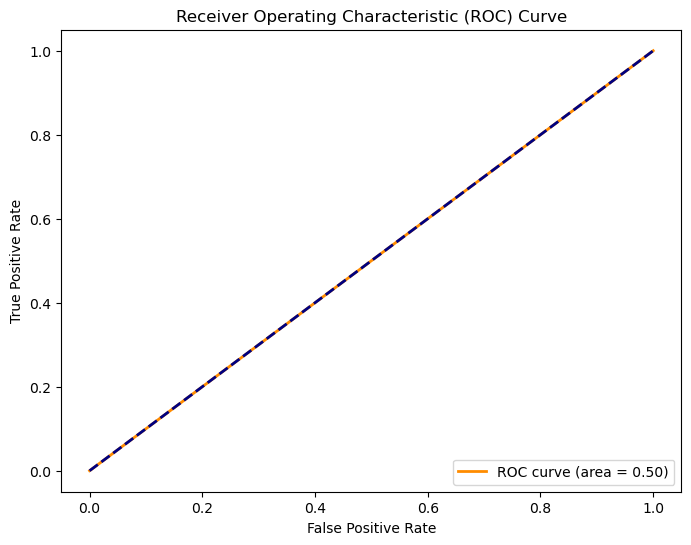

In [49]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Terminated